ADF Statistic: -1.4407471034265025
p-value: 0.5625931773883976
Critical Values: {'1%': np.float64(-3.512738056978279), '5%': np.float64(-2.8974898650628984), '10%': np.float64(-2.585948732897085)}

Differenced Data - ADF Statistic: -4.66915965544451
Differenced Data - p-value: 9.612498486181354e-05
Differenced Data - Critical Values: {'1%': np.float64(-3.512738056978279), '5%': np.float64(-2.8974898650628984), '10%': np.float64(-2.585948732897085)}


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:                Log_PDI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 270.603
Date:                Fri, 13 Jun 2025   AIC                           -535.206
Time:                        17:44:41   BIC                           -527.808
Sample:                    01-01-1970   HQIC                          -532.227
                         - 10-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.004    227.570      0.000       0.991       1.008
ma.L1         -0.9856      0.122     -8.047      0.000      -1.226      -0.746
sigma2         0.0001   1.75e-05      6.469      0.0

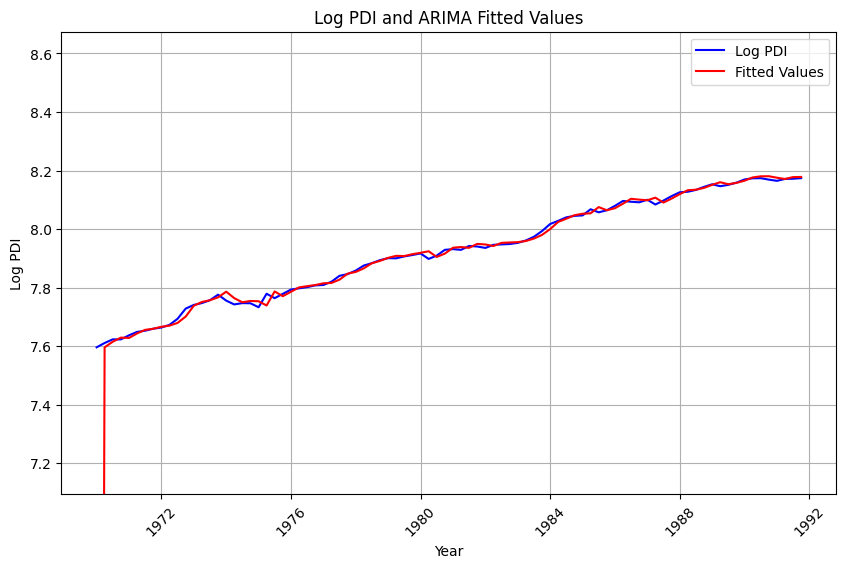

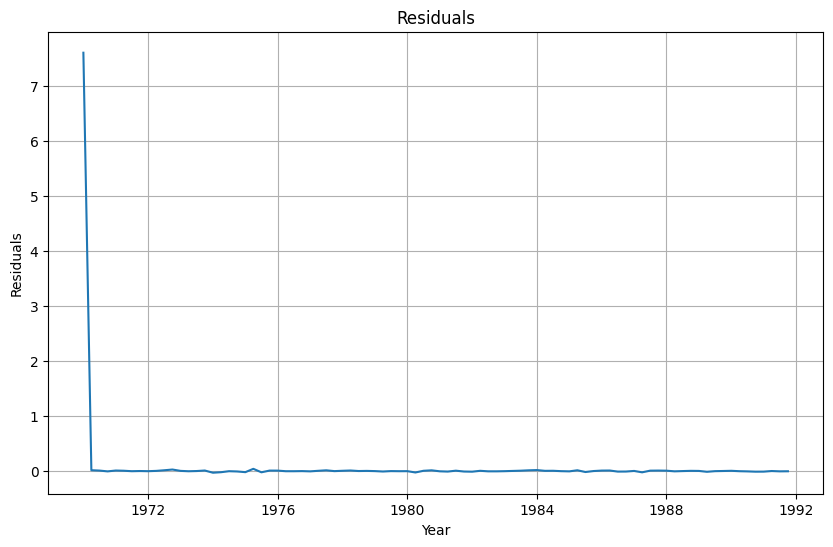

<ipython-input-7-3619405815>:112: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]


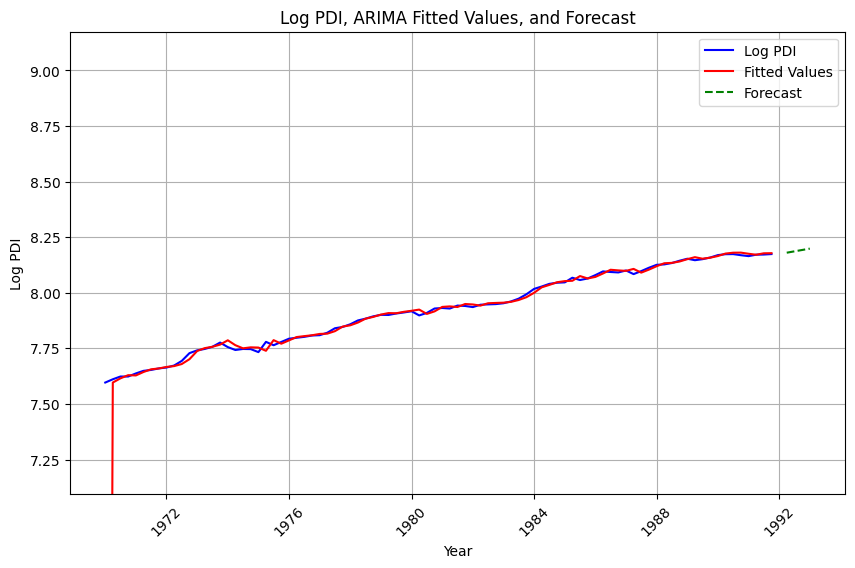

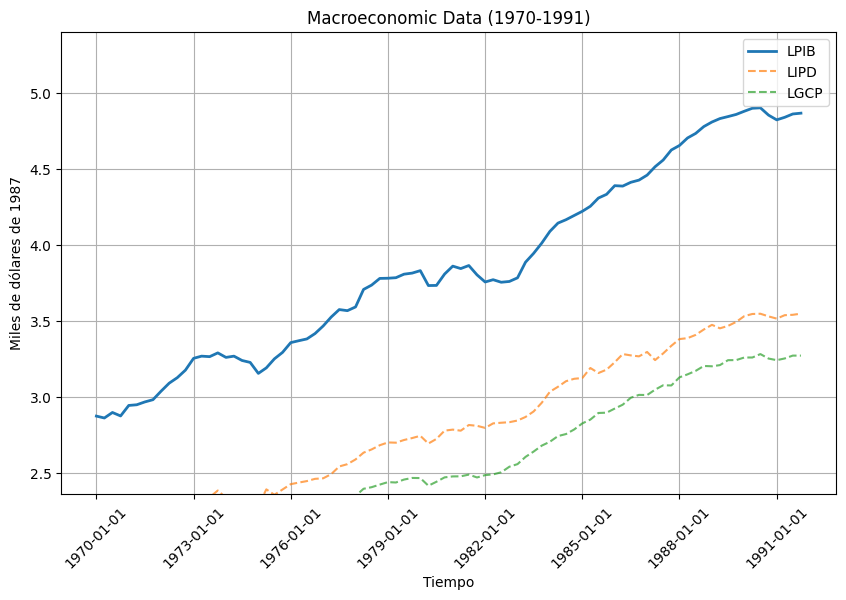

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Data from Table 21.1-1.txt with all columns
data = {
    'YEAR': ['1970.1', '1970.2', '1970.3', '1970.4', '1971.1', '1971.2', '1971.3', '1971.4',
             '1972.1', '1972.2', '1972.3', '1972.4', '1973.1', '1973.2', '1973.3', '1973.4',
             '1974.1', '1974.2', '1974.3', '1974.4', '1975.1', '1975.2', '1975.3', '1975.4',
             '1976.1', '1976.2', '1976.3', '1976.4', '1977.1', '1977.2', '1977.3', '1977.4',
             '1978.1', '1978.2', '1978.3', '1978.4', '1979.1', '1979.2', '1979.3', '1979.4',
             '1980.1', '1980.2', '1980.3', '1980.4', '1981.1', '1981.2', '1981.3', '1981.4',
             '1982.1', '1982.2', '1982.3', '1982.4', '1983.1', '1983.2', '1983.3', '1983.4',
             '1984.1', '1984.2', '1984.3', '1984.4', '1985.1', '1985.2', '1985.3', '1985.4',
             '1986.1', '1986.2', '1986.3', '1986.4', '1987.1', '1987.2', '1987.3', '1987.4',
             '1988.1', '1988.2', '1988.3', '1988.4', '1989.1', '1989.2', '1989.3', '1989.4',
             '1990.1', '1990.2', '1990.3', '1990.4', '1991.1', '1991.2', '1991.3', '1991.4'],
    'GDP': [2872.8, 2860.3, 2896.6, 2873.7, 2942.9, 2947.4, 2966.0, 2980.8,
            3037.3, 3089.7, 3125.8, 3175.5, 3253.3, 3267.6, 3264.3, 3289.1,
            3259.4, 3267.6, 3239.1, 3226.4, 3154.0, 3190.4, 3249.9, 3292.5,
            3356.7, 3369.2, 3381.0, 3416.3, 3466.4, 3525.0, 3574.4, 3567.2,
            3591.8, 3707.0, 3735.6, 3779.6, 3780.8, 3784.3, 3807.5, 3814.6,
            3830.8, 3732.6, 3733.5, 3808.5, 3860.5, 3844.4, 3864.5, 3803.1,
            3756.1, 3771.1, 3754.4, 3759.6, 3783.5, 3886.5, 3944.4, 4012.1,
            4089.5, 4144.0, 4166.4, 4194.2, 4221.8, 4254.8, 4309.0, 4333.5,
            4390.5, 4387.7, 4412.6, 4427.1, 4460.0, 4515.3, 4559.3, 4625.5,
            4655.3, 4704.8, 4734.5, 4779.7, 4809.8, 4832.4, 4845.6, 4859.7,
            4880.8, 4900.3, 4903.3, 4855.1, 4824.0, 4840.7, 4862.7, 4868.0],
    'PDI': [1990.6, 2020.1, 2045.3, 2045.2, 2073.9, 2098.0, 2106.6, 2121.1,
            2129.7, 2149.1, 2193.9, 2272.0, 2300.7, 2315.2, 2337.9, 2382.7,
            2334.7, 2304.5, 2315.0, 2313.7, 2282.5, 2390.3, 2354.4, 2389.4,
            2424.5, 2434.9, 2444.7, 2459.5, 2463.0, 2490.3, 2541.0, 2556.2,
            2587.3, 2631.9, 2653.2, 2680.9, 2699.2, 2697.6, 2715.3, 2728.1,
            2742.9, 2692.0, 2722.5, 2777.0, 2783.7, 2776.7, 2814.1, 2808.8,
            2795.0, 2824.8, 2829.0, 2832.6, 2843.6, 2867.0, 2903.0, 2960.6,
            3033.2, 3065.9, 3102.7, 3118.5, 3123.6, 3189.6, 3156.5, 3178.7,
            3227.5, 3281.4, 3272.6, 3266.2, 3295.2, 3241.7, 3285.7, 3335.8,
            3380.1, 3386.3, 3407.5, 3443.1, 3473.9, 3450.9, 3466.9, 3493.0,
            3531.4, 3545.3, 3547.0, 3529.5, 3514.8, 3537.4, 3539.9, 3547.5],
    'PCE': [1800.5, 1807.5, 1824.7, 1821.2, 1849.9, 1863.5, 1876.9, 1904.6,
            1929.3, 1963.3, 1989.1, 2032.1, 2063.9, 2062.0, 2073.7, 2067.4,
            2050.8, 2059.0, 2065.5, 2039.9, 2051.8, 2086.9, 2114.4, 2137.0,
            2179.3, 2194.7, 2213.0, 2242.0, 2271.3, 2280.8, 2302.6, 2331.6,
            2347.1, 2394.0, 2404.5, 2421.6, 2437.9, 2435.4, 2454.7, 2465.4,
            2464.6, 2414.2, 2440.3, 2469.2, 2475.5, 2476.1, 2487.4, 2468.6,
            2484.0, 2488.9, 2502.5, 2539.3, 2556.5, 2604.0, 2639.0, 2678.2,
            2703.8, 2741.1, 2754.6, 2784.8, 2824.9, 2849.7, 2893.3, 2895.3,
            2922.4, 2947.9, 2993.7, 3012.5, 3011.5, 3046.8, 3075.8, 3074.6,
            3128.2, 3147.8, 3170.6, 3202.9, 3200.9, 3208.6, 3241.1, 3241.6,
            3258.8, 3258.6, 3281.2, 3251.8, 3241.1, 3252.4, 3271.2, 3271.1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Parse the 'YEAR' column into a datetime index
df['YEAR'] = df['YEAR'].apply(lambda x: pd.Timestamp(int(x.split('.')[0]), (int(x.split('.')[1])-1)*3+1, 1))
df.set_index('YEAR', inplace=True)

# Compute the natural logarithm of PDI
df['Log_PDI'] = np.log(df['PDI'])

# Stationarity test (Augmented Dickey-Fuller)
result = adfuller(df['Log_PDI'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# If non-stationary (p-value > 0.05), difference the data
if result[1] > 0.05:
    df['Log_PDI_Diff'] = df['Log_PDI'].diff().dropna()
    # Re-test stationarity on differenced data
    result_diff = adfuller(df['Log_PDI_Diff'].dropna())
    print('\nDifferenced Data - ADF Statistic:', result_diff[0])
    print('Differenced Data - p-value:', result_diff[1])
    print('Differenced Data - Critical Values:', result_diff[4])

# Fit ARIMA model (initial guess: (1,1,1), adjust based on ACF/PACF)
model = ARIMA(df['Log_PDI'], order=(1, 1, 1))
results = model.fit()

# Summary of the model
print(results.summary())

# Plot the original log data and fitted values
plt.figure(figsize=(10, 6))
plt.plot(df['Log_PDI'], label='Log PDI', color='blue')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.title('Log PDI and ARIMA Fitted Values')
plt.xlabel('Year')
plt.ylabel('Log PDI')
plt.ylim(min(df['Log_PDI']) - 0.5, max(df['Log_PDI']) + 0.5)  # Adjust y-axis limits
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Residual diagnostics
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Optional: Forecast for 1992 (4 quarters)
forecast = results.forecast(steps=4)
forecast_index = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]
plt.figure(figsize=(10, 6))
plt.plot(df['Log_PDI'], label='Log PDI', color='blue')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.plot(forecast_index, forecast, color='green', label='Forecast', linestyle='--')
plt.title('Log PDI, ARIMA Fitted Values, and Forecast')
plt.xlabel('Year')
plt.ylabel('Log PDI')
plt.ylim(min(df['Log_PDI']) - 0.5, max(df['Log_PDI']) + 1)  # Extend for forecast
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the data similar to the provided image with corrected scale
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GDP'] / 1000, label='LPIB', linewidth=2)  # Convert to thousands
plt.plot(df.index, df['PDI'] / 1000, label='LIPD', linestyle='--', alpha=0.7)
plt.plot(df.index, df['PCE'] / 1000, label='LGCP', linestyle='--', alpha=0.7)
plt.title('Macroeconomic Data (1970-1991)')
plt.xlabel('Tiempo')
plt.ylabel('Miles de dólares de 1987')
plt.ylim(min(df['GDP'] / 1000) - 0.5, max(df['GDP'] / 1000) + 0.5)
plt.legend()
plt.xticks(df.index[::12], rotation=45)
plt.grid(True)
plt.show()